# World Health Data Cleaning, Exploration, and Visualization
--------------------------
<p style='text-align: right;'> 03_Imputation_Linear_Interpolation.ipynb </p>
<p style='text-align: right;'> October 21 2020, David Diston </p>

### Imputation by Linear Interpolation to Eliminate NaN Values
----------------
Based on the work of the notebooks `01_Introduction.ipynb` (data transposition, and data density calculations), and `02_Removing_Nan.ipynb` (removal of independent variables and countries will greater than 30% missing data) I have substantially reduced the number of NaN values in the dataset. The next step in cleaning the data will involve assessing the remaining missing values in the dataset to determine if imputation is a reasonable path forward.

In [1]:
import numpy as np
import pandas as pd

In [2]:
health = pd.read_csv('reduced_health.csv')

In [3]:
health.head()

,Country Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 0, female, interpolated","Age population, age 0, male, interpolated","Age population, age 01, female, interpolated","Age population, age 01, male, interpolated",...,"Population, male (% of total)","Population, total",Rural population,Rural population (% of total population),Rural population growth (annual %),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Urban population,Urban population (% of total),Urban population growth (annual %)
0,Afghanistan,1960,145.321,81.717726,5.086254,76.631472,178556.0,177635.0,162320.0,165324.0,...,51.693385,8994793.0,8255331.0,91.779,1.511229,21.17069,17.59371,739462.0,8.221,5.253807
1,Afghanistan,1961,145.321,82.755896,5.132610,77.623286,182674.0,181588.0,171491.0,171802.0,...,51.603321,9164945.0,8385191.0,91.492,1.560800,21.70654,18.08250,779754.0,8.508,5.305559
2,Afghanistan,1962,145.321,83.304557,5.139519,78.165038,185434.0,185852.0,169962.0,173605.0,...,51.518691,9343772.0,8521053.0,91.195,1.607275,22.24240,18.57130,822719.0,8.805,5.363622
3,Afghanistan,1963,145.321,83.550740,5.111892,78.438848,187513.0,190462.0,173800.0,178256.0,...,51.439414,9531555.0,8663230.0,90.890,1.654771,22.77282,19.06977,868325.0,9.110,5.395136
4,Afghanistan,1964,145.321,83.734442,5.056177,78.678265,189945.0,195498.0,177926.0,183270.0,...,51.365375,9728645.0,8811623.0,90.574,1.698401,23.30325,19.56825,917022.0,9.426,5.456539


In [4]:
health.shape

(10752, 170)

In [5]:
nans = health.isnull().sum().to_frame()

print(nans.mean())
print(nans.median())

0    61.311765
dtype: float64
0    4.0
dtype: float64


In [6]:
health.isnull().sum().sum()

10423

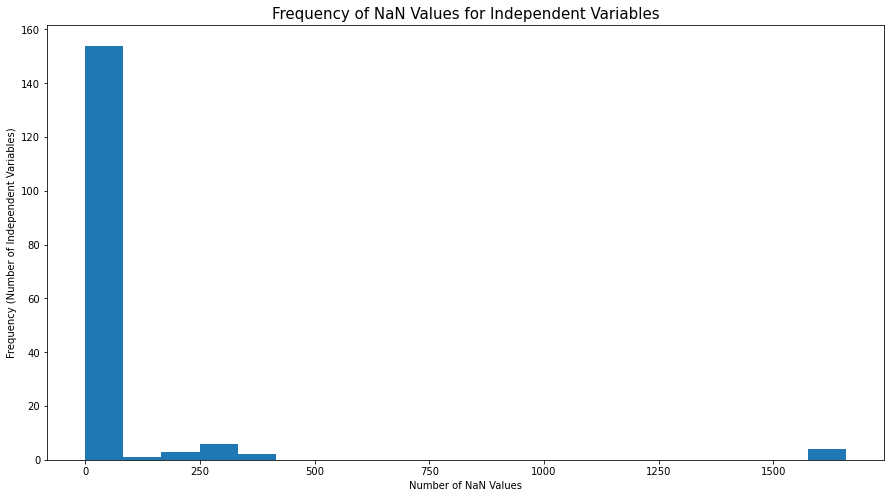

In [7]:
import matplotlib.pyplot as plt

'''
I am interested about the distribution of remaining NaN values in the dataset. Are they evenly spread out across
the dataset, or more concentrated among a few particular independent variables. A histogram of the count of NaN
values for each independent variable will help show this distribution.
'''

plt.figure(figsize = (15,8))
plt.hist(nans[0], bins = 20)
plt.title('Frequency of NaN Values for Independent Variables', fontsize = 15)
plt.xlabel('Number of NaN Values', fontsize = 10)
plt.ylabel('Frequency (Number of Independent Variables)', fontsize = 10)
plt.show()

In [8]:
health[(health.isnull().any(axis = 1) == True) & (health['Country Name'] == 'Afghanistan')]

,Country Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 0, female, interpolated","Age population, age 0, male, interpolated","Age population, age 01, female, interpolated","Age population, age 01, male, interpolated",...,"Population, male (% of total)","Population, total",Rural population,Rural population (% of total population),Rural population growth (annual %),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Urban population,Urban population (% of total),Urban population growth (annual %)
0,Afghanistan,1960,145.321,81.717726,5.086254,76.631472,178556.0,177635.0,162320.0,165324.0,...,51.693385,8994793.0,8255331.0,91.779,1.511229,21.17069,17.59371,739462.0,8.221,5.253807
55,Afghanistan,2015,NaN,86.954464,4.616073,82.338391,470554.0,498844.0,479012.0,505348.0,...,51.569250,32526562.0,23840994.0,73.297,2.230253,NaN,NaN,8685568.0,26.703,4.392152


In [65]:
country_list = health['Country Name'].unique().tolist()
var_list = health.columns.tolist()

In [66]:
health_imputed = pd.DataFrame(columns = var_list)

var_list = var_list[2:]

for country in country_list:
    df = health[health['Country Name'] == country].copy()
    df.reset_index(drop = True, inplace = True)
    for var in var_list:
        y = df.loc[0, var]
        z = df.loc[55, var]
        df2 = df[(df[var].isnull()) & (df[var].shift().isnull())]
        if (df[var].isnull().sum() < (len(df) * 0.2)) & (y != 'NaN') & (z != 'NaN') & (len(df2) < 4):
            df[var].interpolate(method='linear', inplace=True)
    health_imputed = pd.concat([health_imputed, df])
    health_imputed.reset_index(drop = True, inplace = True)
    
print(health_imputed.isnull().sum().sum())

7482


In [67]:
health_imputed.sample(5)

,Country Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 0, female, interpolated","Age population, age 0, male, interpolated","Age population, age 01, female, interpolated","Age population, age 01, male, interpolated",...,"Population, male (% of total)","Population, total",Rural population,Rural population (% of total population),Rural population growth (annual %),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Urban population,Urban population (% of total),Urban population growth (annual %)
2155,Comoros,1987,119.6220,98.345160,6.180961,92.164199,7567.0,7822.0,7288.0,7519.0,...,50.096815,379589.0,279328.0,73.587,2.336924,53.42622,46.42981,100261.0,26.413,4.794921
1127,Bolivia,1967,98.6350,88.737218,7.602494,81.134724,77109.0,78420.0,72753.0,73853.0,...,49.717238,4237126.0,2590494.0,61.138,1.519108,39.80460,34.64988,1646632.0,38.862,2.796240
8968,St. Lucia,1968,161.7962,113.890709,9.897474,103.993235,1829.0,1872.0,1856.0,1930.0,...,48.063372,101181.0,77502.0,76.597,1.323525,64.22163,52.19872,23679.0,23.403,2.722654
5413,Lao PDR,1997,86.6210,91.594667,6.798913,84.795754,82383.0,85458.0,82852.0,85828.0,...,49.839642,5068658.0,4099531.0,80.880,0.950563,56.52466,50.12631,969127.0,19.120,6.784655
1354,Brunei Darussalam,1970,62.7660,87.209940,6.672824,80.537116,2074.0,2226.0,2052.0,2196.0,...,51.665395,129729.0,49719.0,38.325,0.110683,71.80441,65.58275,80010.0,61.675,7.523924


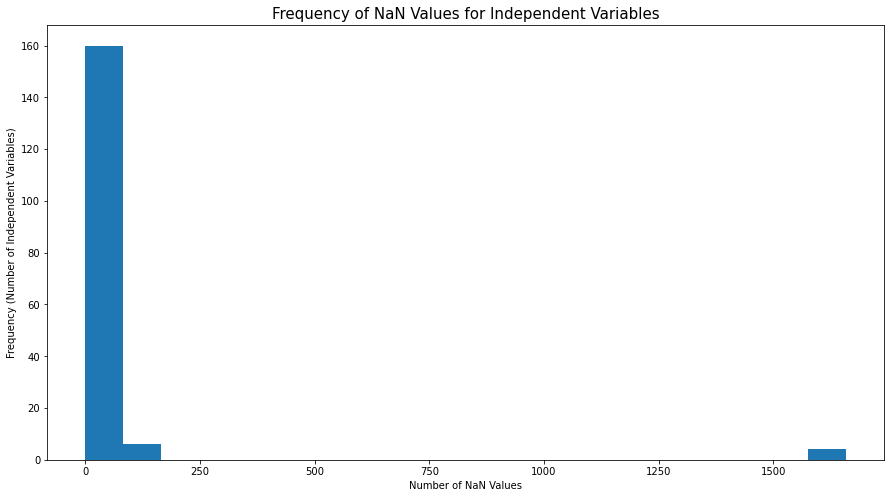

In [68]:
nans2 = health_imputed.isnull().sum().to_frame()

'''
I am interested about the distribution of remaining NaN values in the dataset. Are they evenly spread out across
the dataset, or more concentrated among a few particular independent variables. A histogram of the count of NaN
values for each independent variable will help show this distribution.
'''

plt.figure(figsize = (15,8))
plt.hist(nans2[0], bins = 20)
plt.title('Frequency of NaN Values for Independent Variables', fontsize = 15)
plt.xlabel('Number of NaN Values', fontsize = 10)
plt.ylabel('Frequency (Number of Independent Variables)', fontsize = 10)
plt.show()

In [88]:
count = health_imputed.isnull().sum().to_frame()
count[count[0] > 0]

,0
"Birth rate, crude (per 1,000 people)",62
"Death rate, crude (per 1,000 people)",62
"Fertility rate, total (births per woman)",81
"Life expectancy at birth, female (years)",90
"Life expectancy at birth, male (years)",90
"Life expectancy at birth, total (years)",90
"Mortality rate, adult, female (per 1,000 female adults)",135
"Mortality rate, adult, male (per 1,000 male adults)",135
"Mortality rate, infant (per 1,000 live births)",1659
"Mortality rate, under-5 (per 1,000)",1659


In [89]:
health_imputed[health_imputed['Population growth (annual %)'].isnull()]

,Country Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 0, female, interpolated","Age population, age 0, male, interpolated","Age population, age 01, female, interpolated","Age population, age 01, male, interpolated",...,"Population, male (% of total)","Population, total",Rural population,Rural population (% of total population),Rural population growth (annual %),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Urban population,Urban population (% of total),Urban population growth (annual %)
8344,Seychelles,1960,145.3704,81.076035,10.938382,70.137653,629.0,665.0,663.0,706.0,...,48.957581,41700.0,30160.0,72.327,NaN,63.61709,54.26571,11540.0,27.673,NaN


In [95]:
pd.set_option('display.max_columns', None)

health_imputed.iloc[8344:8344+56]

,Country Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 0, female, interpolated","Age population, age 0, male, interpolated","Age population, age 01, female, interpolated","Age population, age 01, male, interpolated","Age population, age 02, female, interpolated","Age population, age 02, male, interpolated","Age population, age 03, female, interpolated","Age population, age 03, male, interpolated","Age population, age 04, female, interpolated","Age population, age 04, male, interpolated","Age population, age 05, female, interpolated","Age population, age 05, male, interpolated","Age population, age 06, female, interpolated","Age population, age 06, male, interpolated","Age population, age 07, female, interpolated","Age population, age 07, male, interpolated","Age population, age 08, female, interpolated","Age population, age 08, male, interpolated","Age population, age 09, female, interpolated","Age population, age 09, male, interpolated","Age population, age 10, female, interpolated","Age population, age 10, male, interpolated","Age population, age 11, female, interpolated","Age population, age 11, male, interpolated","Age population, age 12, female, interpolated","Age population, age 12, male, interpolated","Age population, age 13, female, interpolated","Age population, age 13, male, interpolated","Age population, age 14, female, interpolated","Age population, age 14, male, interpolated","Age population, age 15, female, interpolated","Age population, age 15, male, interpolated","Age population, age 16, female, interpolated","Age population, age 16, male, interpolated","Age population, age 17, female, interpolated","Age population, age 17, male, interpolated","Age population, age 18, female, interpolated","Age population, age 18, male, interpolated","Age population, age 19, female, interpolated","Age population, age 19, male, interpolated","Age population, age 20, female, interpolated","Age population, age 20, male, interpolated","Age population, age 21, female, interpolated","Age population, age 21, male, interpolated","Age population, age 22, female, interpolated","Age population, age 22, male, interpolated","Age population, age 23, female, interpolated","Age population, age 23, male, interpolated","Age population, age 24, female, interpolated","Age population, age 24, male, interpolated","Age population, age 25, female, interpolated","Age population, age 25, male, interpolated","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Female population 00-04,Female population 05-09,Female population 10-14,Female population 15-19,Female population 20-24,Female population 25-29,Female population 30-34,Female population 35-39,Female population 40-44,Female population 45-49,Female population 50-54,Female population 55-59,Female population 60-64,Female population 65-69,Female population 70-74,Female population 75-79,Female population 80+,"Fertility rate, total (births per woman)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Male population 00-04,Male population 05-09,Male population 10-14,Male population 15-19,Male population 20-24,Male population 25-29,Male population 30-34,Male population 35-39,Male population 40-44,Male population 45-49,Male population 50-54,Male population 55-59,Male population 60-64,Male population 65-69,Male population 70-74,Male population 75-79,Male population 80+,"Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality rate, infant (per 1,000 live births)","Mortality rate, under-5 (per 1,000)",Number of infant deaths,Number of under-five deaths,"Population ages 00-04, female (% of female population)","Population ages 00-04, male (% of male population)",Population ages 00-14 (% of tota

In [96]:
from sklearn.linear_model import LinearRegression

In [153]:
X = health_imputed['Year'].loc[health_imputed['Country Name'] == 'Seychelles'].to_frame()[1:]
y = health_imputed['Population growth (annual %)'].loc[health_imputed['Country Name'] == 'Seychelles'][1:]

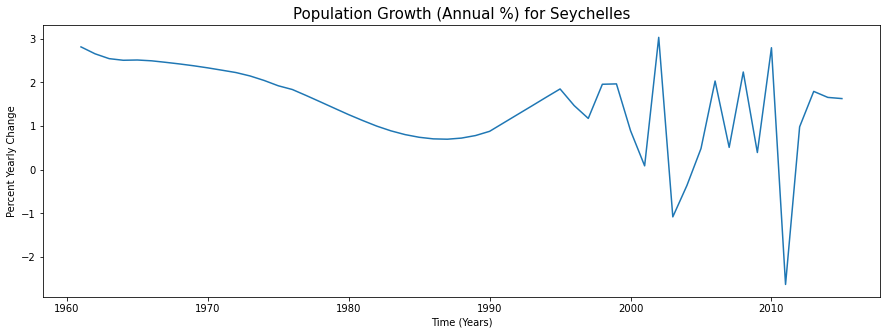

In [154]:
plt.figure(figsize = (15,5))
plt.plot(X, y)
plt.title('Population Growth (Annual %) for Seychelles', fontsize = 15)
plt.xlabel('Time (Years)')
plt.ylabel('Percent Yearly Change')
plt.show()

In [151]:
X = health_imputed['Year'].loc[health_imputed['Country Name'] == 'Seychelles'].to_frame()[1:5]
y = health_imputed['Population growth (annual %)'].loc[health_imputed['Country Name'] == 'Seychelles'][1:5]

regsr = LinearRegression()
regsr.fit(X,y)

x_predict = np.array([1960]).reshape(-1,1)

regsr.predict(x_predict)

array([2.88529057])

In [167]:
impute = regsr.predict(x_predict)

health_imputed.loc[8344, 'Population growth (annual %)'] = round(impute[0], 6)

In [168]:
health_imputed.loc[8344, 'Population growth (annual %)']

2.885291

In [193]:
health_imputed[health_imputed['Urban population growth (annual %)'].isnull()]

,Country Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 0, female, interpolated","Age population, age 0, male, interpolated","Age population, age 01, female, interpolated","Age population, age 01, male, interpolated","Age population, age 02, female, interpolated","Age population, age 02, male, interpolated","Age population, age 03, female, interpolated","Age population, age 03, male, interpolated","Age population, age 04, female, interpolated","Age population, age 04, male, interpolated","Age population, age 05, female, interpolated","Age population, age 05, male, interpolated","Age population, age 06, female, interpolated","Age population, age 06, male, interpolated","Age population, age 07, female, interpolated","Age population, age 07, male, interpolated","Age population, age 08, female, interpolated","Age population, age 08, male, interpolated","Age population, age 09, female, interpolated","Age population, age 09, male, interpolated","Age population, age 10, female, interpolated","Age population, age 10, male, interpolated","Age population, age 11, female, interpolated","Age population, age 11, male, interpolated","Age population, age 12, female, interpolated","Age population, age 12, male, interpolated","Age population, age 13, female, interpolated","Age population, age 13, male, interpolated","Age population, age 14, female, interpolated","Age population, age 14, male, interpolated","Age population, age 15, female, interpolated","Age population, age 15, male, interpolated","Age population, age 16, female, interpolated","Age population, age 16, male, interpolated","Age population, age 17, female, interpolated","Age population, age 17, male, interpolated","Age population, age 18, female, interpolated","Age population, age 18, male, interpolated","Age population, age 19, female, interpolated","Age population, age 19, male, interpolated","Age population, age 20, female, interpolated","Age population, age 20, male, interpolated","Age population, age 21, female, interpolated","Age population, age 21, male, interpolated","Age population, age 22, female, interpolated","Age population, age 22, male, interpolated","Age population, age 23, female, interpolated","Age population, age 23, male, interpolated","Age population, age 24, female, interpolated","Age population, age 24, male, interpolated","Age population, age 25, female, interpolated","Age population, age 25, male, interpolated","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Female population 00-04,Female population 05-09,Female population 10-14,Female population 15-19,Female population 20-24,Female population 25-29,Female population 30-34,Female population 35-39,Female population 40-44,Female population 45-49,Female population 50-54,Female population 55-59,Female population 60-64,Female population 65-69,Female population 70-74,Female population 75-79,Female population 80+,"Fertility rate, total (births per woman)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Male population 00-04,Male population 05-09,Male population 10-14,Male population 15-19,Male population 20-24,Male population 25-29,Male population 30-34,Male population 35-39,Male population 40-44,Male population 45-49,Male population 50-54,Male population 55-59,Male population 60-64,Male population 65-69,Male population 70-74,Male population 75-79,Male population 80+,"Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality rate, infant (per 1,000 live births)","Mortality rate, under-5 (per 1,000)",Number of infant deaths,Number of under-five deaths,"Population ages 00-04, female (% of female population)","Population ages 00-04, male (% of male population)",Population ages 00-14 (% of tota

In [195]:
X = health_imputed['Year'].loc[health_imputed['Country Name'] == 'Seychelles'].to_frame()[1:]
y = health_imputed['Urban population growth (annual %)'].loc[health_imputed['Country Name'] == 'Seychelles'][1:]

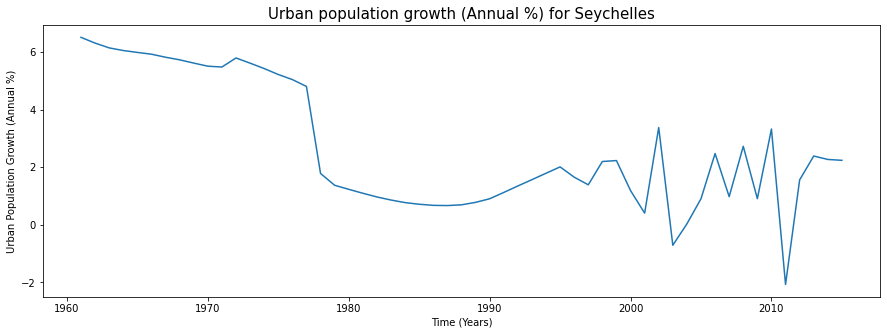

In [196]:
plt.figure(figsize = (15,5))
plt.plot(X, y)
plt.title('Urban population growth (Annual %) for Seychelles', fontsize = 15)
plt.xlabel('Time (Years)')
plt.ylabel('Urban Population Growth (Annual %)')
plt.show()

In [197]:
X = health_imputed['Year'].loc[health_imputed['Country Name'] == 'Seychelles'].to_frame()[1:10]
y = health_imputed['Urban population growth (annual %)'].loc[health_imputed['Country Name'] == 'Seychelles'][1:10]

regsr = LinearRegression()
regsr.fit(X,y)

x_predict = np.array([1960]).reshape(-1,1)

regsr.predict(x_predict)

array([6.51631055])

In [198]:
impute = regsr.predict(x_predict)

health_imputed.loc[8344, 'Urban population growth (annual %)'] = round(impute[0], 6)

In [199]:
health_imputed.loc[8344, 'Urban population growth (annual %)']

6.516311

In [200]:
count = health_imputed.isnull().sum().to_frame()
count[count[0] > 0]

,0
"Birth rate, crude (per 1,000 people)",62
"Death rate, crude (per 1,000 people)",62
"Fertility rate, total (births per woman)",81
"Life expectancy at birth, female (years)",90
"Life expectancy at birth, male (years)",90
"Life expectancy at birth, total (years)",90
"Mortality rate, adult, female (per 1,000 female adults)",135
"Mortality rate, adult, male (per 1,000 male adults)",135
"Mortality rate, infant (per 1,000 live births)",1659
"Mortality rate, under-5 (per 1,000)",1659


In [202]:
health_imputed[health_imputed['Birth rate, crude (per 1,000 people)'].isnull()]

,Country Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 0, female, interpolated","Age population, age 0, male, interpolated","Age population, age 01, female, interpolated","Age population, age 01, male, interpolated","Age population, age 02, female, interpolated","Age population, age 02, male, interpolated","Age population, age 03, female, interpolated","Age population, age 03, male, interpolated","Age population, age 04, female, interpolated","Age population, age 04, male, interpolated","Age population, age 05, female, interpolated","Age population, age 05, male, interpolated","Age population, age 06, female, interpolated","Age population, age 06, male, interpolated","Age population, age 07, female, interpolated","Age population, age 07, male, interpolated","Age population, age 08, female, interpolated","Age population, age 08, male, interpolated","Age population, age 09, female, interpolated","Age population, age 09, male, interpolated","Age population, age 10, female, interpolated","Age population, age 10, male, interpolated","Age population, age 11, female, interpolated","Age population, age 11, male, interpolated","Age population, age 12, female, interpolated","Age population, age 12, male, interpolated","Age population, age 13, female, interpolated","Age population, age 13, male, interpolated","Age population, age 14, female, interpolated","Age population, age 14, male, interpolated","Age population, age 15, female, interpolated","Age population, age 15, male, interpolated","Age population, age 16, female, interpolated","Age population, age 16, male, interpolated","Age population, age 17, female, interpolated","Age population, age 17, male, interpolated","Age population, age 18, female, interpolated","Age population, age 18, male, interpolated","Age population, age 19, female, interpolated","Age population, age 19, male, interpolated","Age population, age 20, female, interpolated","Age population, age 20, male, interpolated","Age population, age 21, female, interpolated","Age population, age 21, male, interpolated","Age population, age 22, female, interpolated","Age population, age 22, male, interpolated","Age population, age 23, female, interpolated","Age population, age 23, male, interpolated","Age population, age 24, female, interpolated","Age population, age 24, male, interpolated","Age population, age 25, female, interpolated","Age population, age 25, male, interpolated","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Female population 00-04,Female population 05-09,Female population 10-14,Female population 15-19,Female population 20-24,Female population 25-29,Female population 30-34,Female population 35-39,Female population 40-44,Female population 45-49,Female population 50-54,Female population 55-59,Female population 60-64,Female population 65-69,Female population 70-74,Female population 75-79,Female population 80+,"Fertility rate, total (births per woman)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Male population 00-04,Male population 05-09,Male population 10-14,Male population 15-19,Male population 20-24,Male population 25-29,Male population 30-34,Male population 35-39,Male population 40-44,Male population 45-49,Male population 50-54,Male population 55-59,Male population 60-64,Male population 65-69,Male population 70-74,Male population 75-79,Male population 80+,"Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality rate, infant (per 1,000 live births)","Mortality rate, under-5 (per 1,000)",Number of infant deaths,Number of under-five deaths,"Population ages 00-04, female (% of female population)","Population ages 00-04, male (% of male population)",Population ages 00-14 (% of tota

In [204]:
health_imputed.iloc[2520:2520+56]

,Country Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 0, female, interpolated","Age population, age 0, male, interpolated","Age population, age 01, female, interpolated","Age population, age 01, male, interpolated","Age population, age 02, female, interpolated","Age population, age 02, male, interpolated","Age population, age 03, female, interpolated","Age population, age 03, male, interpolated","Age population, age 04, female, interpolated","Age population, age 04, male, interpolated","Age population, age 05, female, interpolated","Age population, age 05, male, interpolated","Age population, age 06, female, interpolated","Age population, age 06, male, interpolated","Age population, age 07, female, interpolated","Age population, age 07, male, interpolated","Age population, age 08, female, interpolated","Age population, age 08, male, interpolated","Age population, age 09, female, interpolated","Age population, age 09, male, interpolated","Age population, age 10, female, interpolated","Age population, age 10, male, interpolated","Age population, age 11, female, interpolated","Age population, age 11, male, interpolated","Age population, age 12, female, interpolated","Age population, age 12, male, interpolated","Age population, age 13, female, interpolated","Age population, age 13, male, interpolated","Age population, age 14, female, interpolated","Age population, age 14, male, interpolated","Age population, age 15, female, interpolated","Age population, age 15, male, interpolated","Age population, age 16, female, interpolated","Age population, age 16, male, interpolated","Age population, age 17, female, interpolated","Age population, age 17, male, interpolated","Age population, age 18, female, interpolated","Age population, age 18, male, interpolated","Age population, age 19, female, interpolated","Age population, age 19, male, interpolated","Age population, age 20, female, interpolated","Age population, age 20, male, interpolated","Age population, age 21, female, interpolated","Age population, age 21, male, interpolated","Age population, age 22, female, interpolated","Age population, age 22, male, interpolated","Age population, age 23, female, interpolated","Age population, age 23, male, interpolated","Age population, age 24, female, interpolated","Age population, age 24, male, interpolated","Age population, age 25, female, interpolated","Age population, age 25, male, interpolated","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Female population 00-04,Female population 05-09,Female population 10-14,Female population 15-19,Female population 20-24,Female population 25-29,Female population 30-34,Female population 35-39,Female population 40-44,Female population 45-49,Female population 50-54,Female population 55-59,Female population 60-64,Female population 65-69,Female population 70-74,Female population 75-79,Female population 80+,"Fertility rate, total (births per woman)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Male population 00-04,Male population 05-09,Male population 10-14,Male population 15-19,Male population 20-24,Male population 25-29,Male population 30-34,Male population 35-39,Male population 40-44,Male population 45-49,Male population 50-54,Male population 55-59,Male population 60-64,Male population 65-69,Male population 70-74,Male population 75-79,Male population 80+,"Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality rate, infant (per 1,000 live births)","Mortality rate, under-5 (per 1,000)",Number of infant deaths,Number of under-five deaths,"Population ages 00-04, female (% of female population)","Population ages 00-04, male (% of male population)",Population ages 00-14 (% of tota

In [187]:
impute_list = []

for var in health_imputed.columns:
    if str(health_imputed.loc[8344, var]) == 'nan':
        impute_list.append(var)
    else:
        pass
        
impute_list

['Birth rate, crude (per 1,000 people)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy at birth, total (years)',
 'Rural population growth (annual %)',
 'Urban population growth (annual %)']

In [186]:
health_imputed.loc[8344, 'Rural population growth (annual %)']

nan

In [190]:
health_imputed.iloc[8344:8345]

,Country Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 0, female, interpolated","Age population, age 0, male, interpolated","Age population, age 01, female, interpolated","Age population, age 01, male, interpolated","Age population, age 02, female, interpolated","Age population, age 02, male, interpolated","Age population, age 03, female, interpolated","Age population, age 03, male, interpolated","Age population, age 04, female, interpolated","Age population, age 04, male, interpolated","Age population, age 05, female, interpolated","Age population, age 05, male, interpolated","Age population, age 06, female, interpolated","Age population, age 06, male, interpolated","Age population, age 07, female, interpolated","Age population, age 07, male, interpolated","Age population, age 08, female, interpolated","Age population, age 08, male, interpolated","Age population, age 09, female, interpolated","Age population, age 09, male, interpolated","Age population, age 10, female, interpolated","Age population, age 10, male, interpolated","Age population, age 11, female, interpolated","Age population, age 11, male, interpolated","Age population, age 12, female, interpolated","Age population, age 12, male, interpolated","Age population, age 13, female, interpolated","Age population, age 13, male, interpolated","Age population, age 14, female, interpolated","Age population, age 14, male, interpolated","Age population, age 15, female, interpolated","Age population, age 15, male, interpolated","Age population, age 16, female, interpolated","Age population, age 16, male, interpolated","Age population, age 17, female, interpolated","Age population, age 17, male, interpolated","Age population, age 18, female, interpolated","Age population, age 18, male, interpolated","Age population, age 19, female, interpolated","Age population, age 19, male, interpolated","Age population, age 20, female, interpolated","Age population, age 20, male, interpolated","Age population, age 21, female, interpolated","Age population, age 21, male, interpolated","Age population, age 22, female, interpolated","Age population, age 22, male, interpolated","Age population, age 23, female, interpolated","Age population, age 23, male, interpolated","Age population, age 24, female, interpolated","Age population, age 24, male, interpolated","Age population, age 25, female, interpolated","Age population, age 25, male, interpolated","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Female population 00-04,Female population 05-09,Female population 10-14,Female population 15-19,Female population 20-24,Female population 25-29,Female population 30-34,Female population 35-39,Female population 40-44,Female population 45-49,Female population 50-54,Female population 55-59,Female population 60-64,Female population 65-69,Female population 70-74,Female population 75-79,Female population 80+,"Fertility rate, total (births per woman)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Male population 00-04,Male population 05-09,Male population 10-14,Male population 15-19,Male population 20-24,Male population 25-29,Male population 30-34,Male population 35-39,Male population 40-44,Male population 45-49,Male population 50-54,Male population 55-59,Male population 60-64,Male population 65-69,Male population 70-74,Male population 75-79,Male population 80+,"Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality rate, infant (per 1,000 live births)","Mortality rate, under-5 (per 1,000)",Number of infant deaths,Number of under-five deaths,"Population ages 00-04, female (% of female population)","Population ages 00-04, male (% of male population)",Population ages 00-14 (% of tota

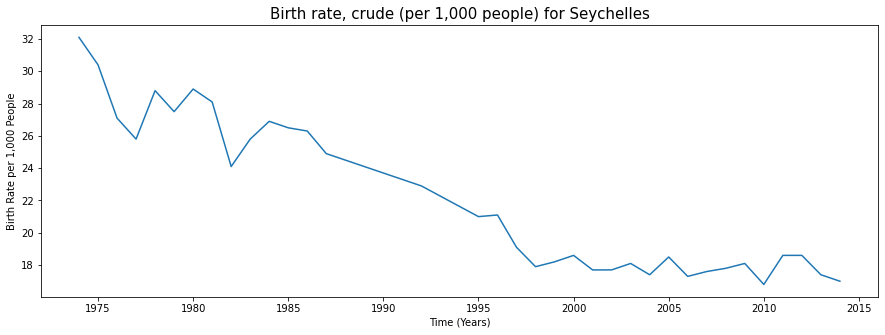

In [192]:
X = health_imputed['Year'].loc[health_imputed['Country Name'] == 'Seychelles'].to_frame()[1:]
y = health_imputed['Birth rate, crude (per 1,000 people)'].loc[health_imputed['Country Name'] == 'Seychelles'][1:]

plt.figure(figsize = (15,5))
plt.plot(X, y)
plt.title('Birth rate, crude (per 1,000 people) for Seychelles', fontsize = 15)
plt.xlabel('Time (Years)')
plt.ylabel('Birth Rate per 1,000 People')
plt.show()